In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from numpy.random import default_rng
rng = default_rng()

NUMBER_OF_CITIES = 7

In [2]:
df = pd.read_csv('dataset.csv', delimiter= ";")
df.head()

,Geoname ID,Name,ASCII Name,Alternate Names,Feature Class,Feature Code,Country Code,Country name EN,Country Code 2,Admin1 Code,Admin2 Code,Admin3 Code,Admin4 Code,Population,Elevation,DIgital Elevation Model,Timezone,Modification date,LABEL EN,Coordinates
0,304531,Mersin,Mersin,"Icel,Mersin,Mersina,Mersine,Merson,Mersyna,Myr...",P,PPLA,TR,Turkey,NaN,32,NaN,NaN,NaN,537842,NaN,10,Europe/Istanbul,2017-11-10,Turkey,"36.81196,34.63886"
1,746425,Gümüşhane,Gumushane,"Argyroupoli,Gjumjushane,Guemueshane,Gumusane,G...",P,PPLA,TR,Turkey,NaN,69,NaN,NaN,NaN,32250,NaN,1180,Europe/Istanbul,2020-07-09,Turkey,"40.46001,39.47176"
2,316541,Diyarbakır,Diyarbakir,"Amed,Amida,DIY,Diarbekir,Diarbekr,Diari-Bekir,...",P,PPLA,TR,Turkey,NaN,21,NaN,NaN,NaN,644763,NaN,674,Europe/Istanbul,2020-06-10,Turkey,"37.91363,40.21721"
3,750516,Bolu,Bolu,"Balu,Boli,Bolou,Bolu,Claudiopolis,bo lu,bollu,...",P,PPLA,TR,Turkey,NaN,14,NaN,NaN,NaN,96629,NaN,733,Europe/Istanbul,2019-09-05,Turkey,"40.73583,31.60611"
4,311046,İzmir,Izmir,"Azmir,Esmirna,IZM,Ismir,Izmir,Izmira,Izmiras,I...",P,PPLA,TR,Turkey,NaN,35,NaN,NaN,NaN,2500603,NaN,122,Europe/Istanbul,2020-06-10,Turkey,"38.41273,27.13838"


In [3]:
# get column names
column_names = []
for col in df.columns:
    column_names.append(col)
print(column_names)

['Geoname ID', 'Name', 'ASCII Name', 'Alternate Names', 'Feature Class', 'Feature Code', 'Country Code', 'Country name EN', 'Country Code 2', 'Admin1 Code', 'Admin2 Code', 'Admin3 Code', 'Admin4 Code', 'Population', 'Elevation', 'DIgital Elevation Model', 'Timezone', 'Modification date', 'LABEL EN', 'Coordinates']


In [4]:
# create the list of columns will be deleted
columns2delete = []
for col in column_names:
    if(col!='Name' and col!='Coordinates'):
        columns2delete.append(col) 
        
df = df.drop(columns2delete, axis=1)

In [5]:
df.head()

,Name,Coordinates
0,Mersin,"36.81196,34.63886"
1,Gümüşhane,"40.46001,39.47176"
2,Diyarbakır,"37.91363,40.21721"
3,Bolu,"40.73583,31.60611"
4,İzmir,"38.41273,27.13838"


In [6]:
df.tail()

,Name,Coordinates
75,Manisa,"38.61202,27.42647"
76,Kütahya,"39.42417,29.98333"
77,Tekirdağ,"40.9781,27.51101"
78,Hakkâri,"37.57444,43.74083"
79,Adıyaman,"37.76441,38.27629"


In [7]:
# getting row number of dataset
number_of_rows = len(df.index)
# randomly choose cities
cities_indices = random.sample(range(number_of_rows), NUMBER_OF_CITIES)
cities = df.iloc[cities_indices]
# recreate indices
cities.index = np.arange(NUMBER_OF_CITIES)

In [8]:
cities.head(NUMBER_OF_CITIES)

,Name,Coordinates
0,Kırklareli,"41.73508,27.22521"
1,Siirt,"37.9293,41.94134"
2,Adapazarı,"40.78056,30.40333"
3,Sinop,"42.02683,35.16253"
4,Giresun,"40.91698,38.38741"
5,Adıyaman,"37.76441,38.27629"
6,Şırnak,"37.51393,42.45432"


In [9]:
# parse coordinates from dataset
apsis = []
ordinat = []
for city in range(len(cities)):
    corr = cities.iloc[city]['Coordinates']
    temp_apsis = []
    temp_ordinat = []
    comma_detected = False
    for letter in corr:
        if letter == ',':
            comma_detected = True
            continue
            
        if comma_detected == False:
            temp_ordinat.append(letter)
        else:
            temp_apsis.append(letter)
    apsis.append(''.join(temp_apsis))
    ordinat.append(''.join(temp_ordinat))
xcord = [eval(i) for i in apsis]
ycord = [eval(i) for i in ordinat]
print(xcord)
print(ycord)

[27.22521, 41.94134, 30.40333, 35.16253, 38.38741, 38.27629, 42.45432]
[41.73508, 37.9293, 40.78056, 42.02683, 40.91698, 37.76441, 37.51393]


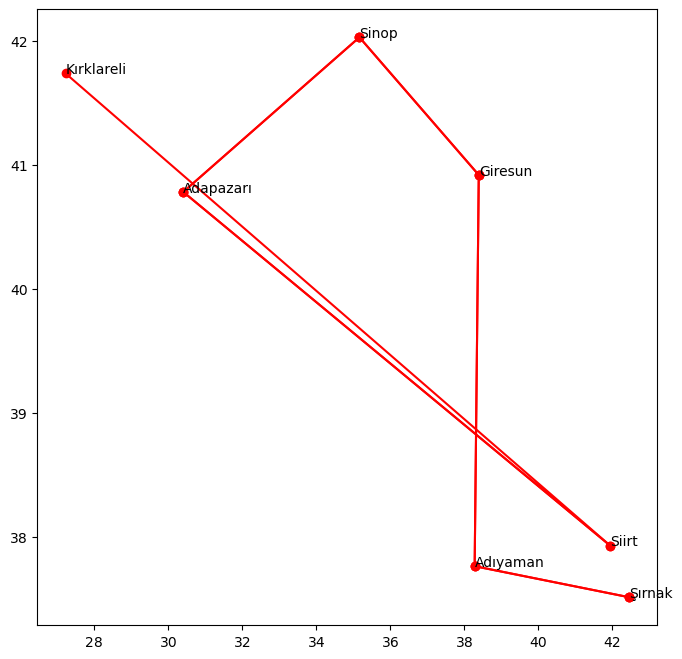

In [10]:
# plot cities and initial route

# edit figure size
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

# line between spots 
for i in range(0, len(xcord), 1):
    plt.plot(xcord[i:i+3], ycord[i:i+3], 'ro-')
    plt.annotate(cities.iloc[i]['Name'],(xcord[i], ycord[i])) # write city names

plt.show()

In [11]:
# 0 to N, non-repeating random number generator function
## "the minimum number=0" and "the maximum number = (number_of_elements-1)" 
## for example if the number_of_elements=7, "the minimum number=0", "the maximum number=6"

def non_repeating_random_number_generator_zero_to_N(number_of_elements):
    numbers = rng.choice(number_of_elements, size=number_of_elements, replace=False)
    return np.array(numbers)

In [12]:
nrrng = non_repeating_random_number_generator_zero_to_N(NUMBER_OF_CITIES)
print(nrrng)
cities.reindex(nrrng)

[3 6 4 0 2 1 5]


,Name,Coordinates
3,Sinop,"42.02683,35.16253"
6,Şırnak,"37.51393,42.45432"
4,Giresun,"40.91698,38.38741"
0,Kırklareli,"41.73508,27.22521"
2,Adapazarı,"40.78056,30.40333"
1,Siirt,"37.9293,41.94134"
5,Adıyaman,"37.76441,38.27629"


In [13]:
def coordinate_parser(route):
    cities.reindex(route)
    xcord = []
    ycord = []
    apsis = []
    ordinat = []
    for city in route:
        coordinate = cities.iloc[city]['Coordinates']
        
        temp_apsis   =  []
        temp_ordinat =  []
        comma_detected = False
        for letter in coordinate:
            if letter == ',':
                comma_detected = True
                continue
            if comma_detected == False:
                temp_ordinat.append(letter)
            else:
                temp_apsis.append(letter)
        apsis.append(''.join(temp_apsis))
        ordinat.append(''.join(temp_ordinat))
    xcord = [eval(i) for i in apsis]
    ycord = [eval(i) for i in ordinat]
    return([xcord,ycord])

In [14]:
coordinate_parser(nrrng)

[[35.16253, 42.45432, 38.38741, 27.22521, 30.40333, 41.94134, 38.27629],
 [42.02683, 37.51393, 40.91698, 41.73508, 40.78056, 37.9293, 37.76441]]

In [15]:
# to do: complete route calculator function

def distance_calculator(route):

    coords=coordinate_parser(route)

    distance = np.array(0)
    for city in range(len(coords[0])-1):
        x2_x1 = np.subtract(coords[0][city+1],coords[0][city])
        y2_y1 = np.subtract(coords[1][city+1],coords[1][city])
        squared_x2_x1  = np.square(x2_x1)
        squared_y2_y1  = np.square(y2_y1)
        sum_of_squares = np.sum([squared_x2_x1,squared_y2_y1])
        distance_between_two_points = np.sqrt(sum_of_squares)
        distance = np.sum([distance, distance_between_two_points])
    
    return(distance)


In [16]:
distance_calculator(nrrng)

43.942571190954766

In [17]:
def plot_route(route): # this function plots the route within city locations
    
    # get coordinates
    coords  = coordinate_parser(route)
    xcoords = coords[0]
    ycoords = coords[1]
    
    # edit figure size
    f = plt.figure()
    f.set_figwidth(8)
    f.set_figheight(8)

    # line between spots 
    for i in range(0, len(xcoords), 1):
        plt.plot(xcoords[i:i+3], ycoords[i:i+3], 'ro-')
        plt.annotate(cities.iloc[i]['Name'],(xcord[i], ycord[i])) # write city names

    plt.show()

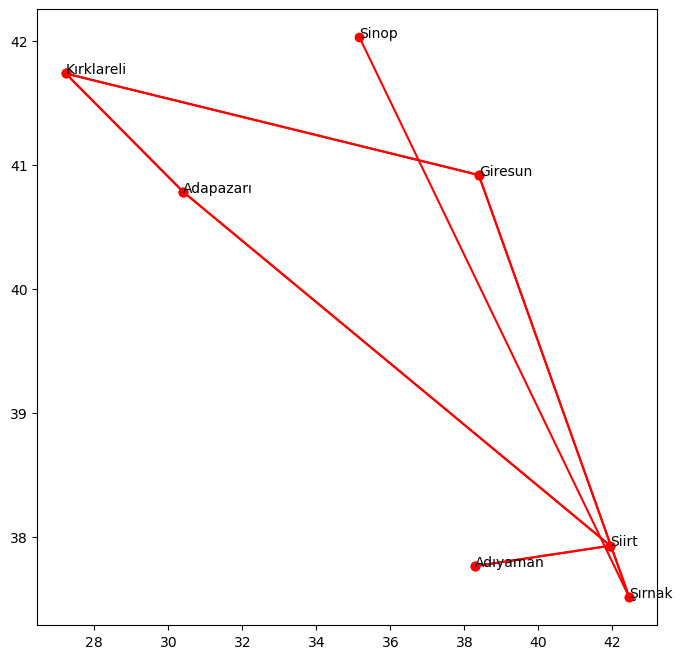

In [18]:
plot_route(nrrng)

In [19]:
def create_initial_population(number_of_routes = NUMBER_OF_CITIES): # this function creates routes to start algorithm
    routes = np.array([])
    for i in range(number_of_routes-1):
        route  = non_repeating_random_number_generator_zero_to_N(NUMBER_OF_CITIES)
        if(i!=0) : routes = np.append(routes, [route], axis=0)
        else     : routes = [route]
    return routes

In [20]:
population = create_initial_population()
print(population)

[[2 4 6 1 0 5 3]
 [4 0 1 6 5 2 3]
 [4 1 0 5 2 3 6]
 [4 3 5 0 6 2 1]
 [5 3 1 2 6 0 4]
 [2 3 4 6 5 0 1]]


In [21]:
def route_distance_calculate(chromosome):
  route_distances = np.array([])

  for i in range(len(chromosome)):
    mesafe = distance_calculator(chromosome[i])
    if(i!=0):
      route_distances = np.append(route_distances, [mesafe], axis=0)
    else:
      route_distances = [mesafe]

  return route_distances

In [22]:
distances = route_distance_calculate(population)
print(distances)

[46.16983918 44.58861725 53.51190675 60.60615216 64.56599463 44.76164197]


In [23]:
def fitness_calculate(chromosome):
    fitness_points = np.zeros(len(chromosome), dtype=int)
    distances = route_distance_calculate(chromosome)
    fitness_points = np.divide(1.0, distances) 
    
    return fitness_points
    

In [24]:
fitness_points = fitness_calculate(population)
print(fitness_points)

[0.02165916 0.02242725 0.01868743 0.01649998 0.01548803 0.02234056]
